# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Awi Yunawan Putra]
- **Email:** [awiyunawan@putra]
- **ID Dicoding:** [awiyunawan]

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan jumlah pengguna sepeda (casual dan registered) pada hari kerja
- Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna sepeda (casual dan registered) setiap jamnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset `day_df` berisi data penggunaan sepeda harian dengan 731 baris dan 16 kolom.
- Dataset `hour_df` berisi data penggunaan sepeda per jam dengan 17379 baris dan 17 kolom.
- Kedua dataset memiliki kolom yang mencakup informasi tentang tanggal, musim, tahun, bulan, hari libur, hari kerja, kondisi cuaca, suhu, kelembaban, kecepatan angin, dan jumlah pengguna sepeda (casual dan registered).
- Dataset `day_df` memiliki kolom tambahan `workingday` yang menunjukkan apakah hari tersebut adalah hari kerja atau bukan.
- Dataset `hour_df` memiliki kolom tambahan `hr` yang menunjukkan jam dalam sehari.

### Assessing Data

In [4]:
# Mengecek informasi umum dari kedua dataset
print("Informasi dataset day_df:")
day_df.info()
print("\nInformasi dataset hour_df:")
hour_df.info()

# Mengecek jumlah duplikasi pada kedua dataset
print("\nJumlah duplikasi pada dataset day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi pada dataset hour_df: ", hour_df.duplicated().sum())

# Mengecek jumlah nilai yang hilang pada kedua dataset
print("\nJumlah nilai yang hilang pada dataset day_df:\n", day_df.isna().sum())
print("Jumlah nilai yang hilang pada dataset hour_df:\n", hour_df.isna().sum())

Informasi dataset day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi dataset hour_df:
<class 'pandas.core.frame.DataFrame'>
R

**Insight:**
- xxx
- xxx

### Cleaning Data

In [5]:
# Menghapus duplikasi pada kedua dataset
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

# Mengisi nilai yang hilang dengan metode forward fill
day_df.fillna(method='ffill', inplace=True)
hour_df.fillna(method='ffill', inplace=True)

# Mengubah tipe data kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengecek kembali informasi umum dari kedua dataset setelah cleansing
print("Informasi dataset day_df setelah cleansing:")
day_df.info()
print("\nInformasi dataset hour_df setelah cleansing:")
hour_df.info()

Informasi dataset day_df setelah cleansing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    in

C:\Users\hisag\AppData\Local\Temp\ipykernel_5496\1305599002.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  day_df.fillna(method='ffill', inplace=True)
C:\Users\hisag\AppData\Local\Temp\ipykernel_5496\1305599002.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hour_df.fillna(method='ffill', inplace=True)


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

Rata-rata jumlah pengguna sepeda pada hari kerja dan hari libur:


                 casual   registered
workingday                          
0           1371.134199  2959.034632
1            606.570000  3978.250000


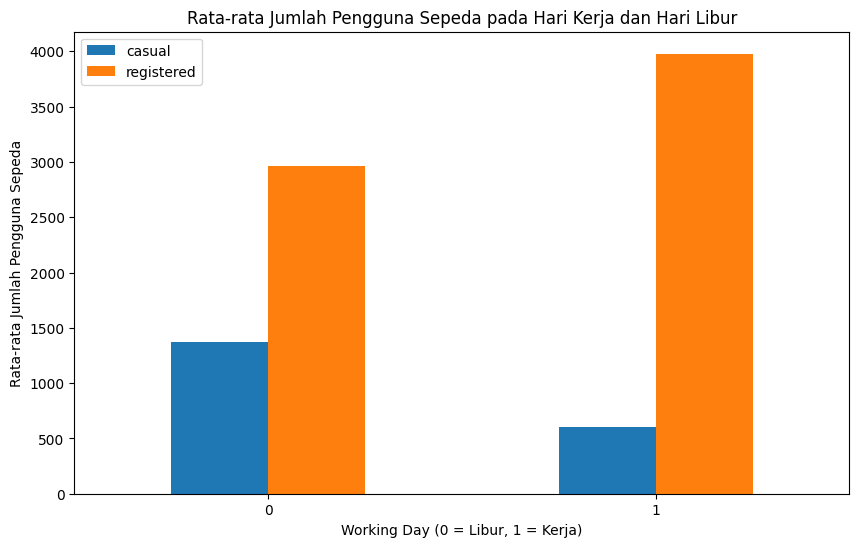

Rata-rata jumlah pengguna sepeda berdasarkan kondisi cuaca:
               casual  registered
weathersit                       
1           40.545431  164.323841
2           29.595290  145.570202
3           16.055673   95.523608
4            2.666667   71.666667


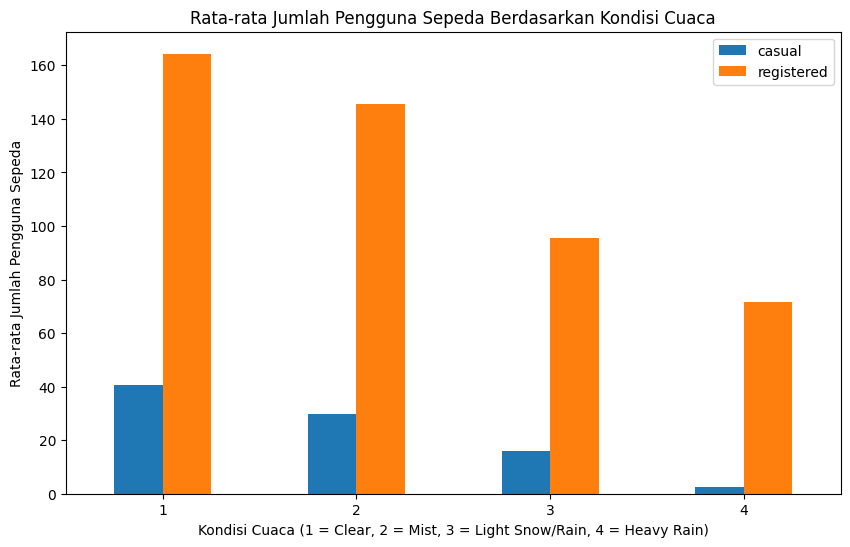

In [6]:
# Pertanyaan 1: Apakah ada perbedaan jumlah pengguna sepeda (casual dan registered) pada hari kerja?

# Menghitung rata-rata jumlah pengguna sepeda (casual dan registered) pada hari kerja dan hari libur
workingday_avg = day_df.groupby('workingday')[['casual', 'registered']].mean()
print("Rata-rata jumlah pengguna sepeda pada hari kerja dan hari libur:")
print(workingday_avg)

# Visualisasi perbedaan jumlah pengguna sepeda pada hari kerja dan hari libur
workingday_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Jumlah Pengguna Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Working Day (0 = Libur, 1 = Kerja)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(rotation=0)
plt.show()

# Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna sepeda (casual dan registered) setiap jamnya?

# Menghitung rata-rata jumlah pengguna sepeda (casual dan registered) berdasarkan kondisi cuaca
weather_avg = hour_df.groupby('weathersit')[['casual', 'registered']].mean()
print("Rata-rata jumlah pengguna sepeda berdasarkan kondisi cuaca:")
print(weather_avg)

# Visualisasi pengaruh kondisi cuaca terhadap jumlah pengguna sepeda
weather_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1 = Clear, 2 = Mist, 3 = Light Snow/Rain, 4 = Heavy Rain)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

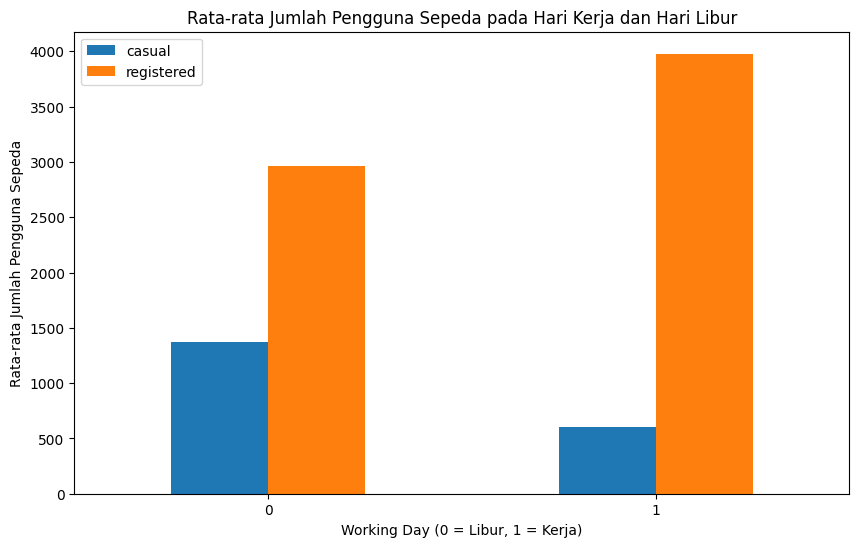

In [7]:
# Visualisasi perbedaan jumlah pengguna sepeda pada hari kerja dan hari libur
workingday_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Jumlah Pengguna Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Working Day (0 = Libur, 1 = Kerja)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 2:

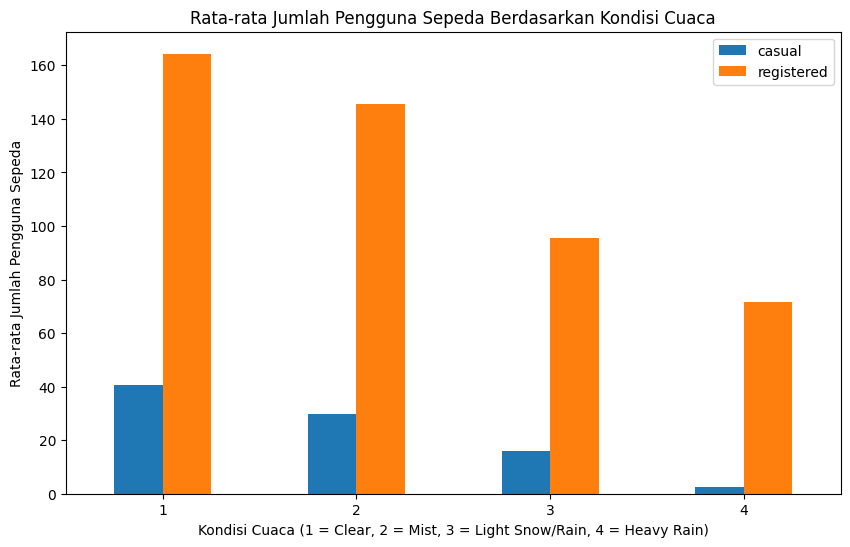

In [8]:
# Visualisasi pengaruh kondisi cuaca terhadap jumlah pengguna sepeda
weather_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1 = Clear, 2 = Mist, 3 = Light Snow/Rain, 4 = Heavy Rain)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2